In [1]:
%reset -f

import pandas as pd
import numpy as np
# import folium   
import os
# import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 16})
from matplotlib.transforms import ScaledTranslation
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.ticker import AutoLocator
import seaborn as sns

In [2]:
import geopandas as gpd
from bokeh.plotting import figure, output_notebook, show
output_notebook()
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, HoverTool, WheelZoomTool, WMTSTileSource
from bokeh.palettes import Viridis256

def plot_geo_scatter_map(df, value_col, title="Geo Map", colorbar_title="Value", unit=""):
    # Create GeoDataFrame and project to Web Mercator
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs="EPSG:4326").to_crs("EPSG:3857")
    gdf['x'], gdf['y'] = gdf.geometry.x, gdf.geometry.y

    # Setup Bokeh figure
    p = figure(
        title=title, width=800, height=500,
        x_axis_type="mercator", y_axis_type="mercator",
        tools="pan,reset,save",
        x_range=(gdf['x'].min()-300, gdf['x'].max()+300),
        y_range=(gdf['y'].min()-300, gdf['y'].max()+300)
    )
    p.add_tools(WheelZoomTool(zoom_on_axis=False))
    p.add_tile(WMTSTileSource(
        url='https://cartodb-basemaps-4.global.ssl.fastly.net/light_all/{Z}/{X}/{Y}.png',
        attribution="© CartoDB contributors")
    )

    # Color mapping and data source
    color_mapper = LinearColorMapper(palette=Viridis256, low=gdf[value_col].min(), high=gdf[value_col].max())
    source = ColumnDataSource(gdf[['x', 'y', value_col, 'Latitude', 'Longitude']])

    # Scatter points
    p.scatter(
        x='x', y='y', size=5, source=source,
        fill_color={'field': value_col, 'transform': color_mapper},
        line_color=None, fill_alpha=0.7
    )

    # Color bar and hover
    p.add_layout(ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title=colorbar_title), 'right')
    p.add_tools(HoverTool(tooltips=[
        ("Lat/Lon", "@{Latitude}, @{Longitude}"),
        (value_col, f"@{{{value_col}}} {unit}")
    ]))

    p.toolbar.active_drag = None
    p.toolbar.active_inspect = None

    show(p)

Loading BokehJS ...

In [3]:
df_app_ping = pd.read_csv('../_data/Spring2025_ArkansasNH/app_ping.csv')
df_app_ping = df_app_ping[df_app_ping['Test Status'] == 'Completed']

In [4]:
print(df_app_ping['Collection'].value_counts())

Collection
Day1-TMO-MNO-DEF-IN       55
Day2-VZN-MNO-DEF-IN       23
Day1-TMO-MNO-DEF-OUT      21
Day2-ATT-MNO-DEF-IN       21
Day2-ATT-MNO-4G-IN        21
Day1-TMO-NH-IN            20
Day2-ATT-MNO-4G-OUT       20
Day2-ATT-MNO-DEF-OUT      19
Day1-ATT-MNO-DEF-OUT      18
Day2-VZN-MNO-4G-IN        17
Day2-VZN-MNO-4G-OUT       17
Day2-VZN-MNO-DEF-OUTER    16
Day1-ATT-MNO-DEF-IN       16
Day2-VZN-MNO-DEF-OUT      16
Day2-TMO-MNO-4G-IN        16
Day2-TMO-MNO-DEF-IN       16
Day2-TMO-MNO-4G-OUT       15
Day2-TMO-MNO-DEF-OUT      14
Day3_TMO-NH-L1            13
Day2-TMO-MNO-DEF-OUTER    13
Day1-WIFI-IN              12
Day1-ATT-NH-IN            12
Day3_ATT-NH-IN-L2         12
Day2-ATT-MNO-DEF-OUTER    11
Day1-ATT-NH-OUT            8
Day3_ATT-MNO-DEF-IN-L2     8
Day3_ATT-MNO-DEF-IN-L1     8
Day3_ATT-NH-IN-L1          7
Day1-WIFI-OUT              7
Day3_TMO-DEF-IN-L2         6
Day3_TMO-NH-L2             6
Day3_TMO-DEF-L1-V1         6
Day3_TMO-DEF-L2            5
Day1-TMO-NH-OUT            3
Day

In [5]:
df_app_ping['Collection_1'] = np.nan

df_app_ping['Collection_1'] = np.where(df_app_ping['Collection'].isin(['Day1-WIFI-IN']), 'WIFI-IN', df_app_ping['Collection_1'])
df_app_ping['Collection_1'] = np.where(df_app_ping['Collection'].isin(['Day1-ATT-NH-IN']), 'ATT-NH-IN', df_app_ping['Collection_1'])
df_app_ping['Collection_1'] = np.where(df_app_ping['Collection'].isin(['Day1-TMO-NH-IN']), 'TMO-NH-IN', df_app_ping['Collection_1'])
df_app_ping['Collection_1'] = np.where(df_app_ping['Collection'].isin(['Day2-ATT-MNO-DEF-OUT', 'Day2-ATT-MNO-4G-OUT', 'Day1-ATT-MNO-DEF-OUT']), 'ATT-MNO-OUT', df_app_ping['Collection_1'])
df_app_ping['Collection_1'] = np.where(df_app_ping['Collection'].isin(['Day1-TMO-MNO-DEF-OUT', 'Day2-TMO-MNO-4G-OUT', 'Day2-TMO-MNO-DEF-OUT']), 'TMO-MNO-OUT', df_app_ping['Collection_1'])
df_app_ping['Collection_1'] = np.where(df_app_ping['Collection'].isin(['Day2-VZN-MNO-4G-OUT', 'Day2-VZN-MNO-DEF-OUT']), 'VZN-MNO-OUT', df_app_ping['Collection_1'])
df_app_ping['Collection_1'] = np.where(df_app_ping['Collection'].isin(['Day2-ATT-MNO-4G-IN', 'Day2-ATT-MNO-DEF-IN', 'Day1-ATT-MNO-DEF-IN']), 'ATT-MNO-IN', df_app_ping['Collection_1'])
df_app_ping['Collection_1'] = np.where(df_app_ping['Collection'].isin(['Day1-TMO-MNO-DEF-IN', 'Day2-TMO-MNO-4G-IN', 'Day2-TMO-MNO-DEF-IN']), 'TMO-MNO-IN', df_app_ping['Collection_1'])
df_app_ping['Collection_1'] = np.where(df_app_ping['Collection'].isin(['Day2-VZN-MNO-DEF-IN', 'Day2-VZN-MNO-4G-IN']), 'VZN-MNO-IN', df_app_ping['Collection_1'])

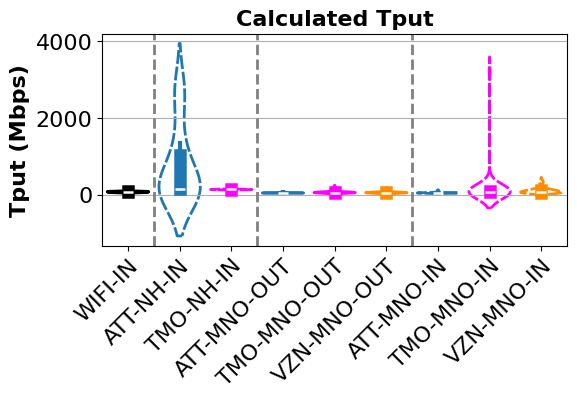

In [7]:
# Application Ping
fig, ax = plt.subplots(figsize=(6, 2.75))
order = ['WIFI-IN', 'ATT-NH-IN', 'TMO-NH-IN', 'ATT-MNO-OUT', 'TMO-MNO-OUT', 'VZN-MNO-OUT', 'ATT-MNO-IN', 'TMO-MNO-IN', 'VZN-MNO-IN']
palette = ['black', 'tab:blue', 'magenta', 'tab:blue', 'magenta', 'darkorange', 'tab:blue', 'magenta', 'darkorange']
sns.violinplot(data=df_app_ping, x='Collection_1', y='Round Trip Time Average', hue='Collection_1', fill=False, linewidth=2, order=order, hue_order=order, palette=palette, ax=ax)
for i in [1,2,6,7,8]:
    ax.collections[i].set_linestyle((0,(5,1))) # for densly dashed lines
plt.axvline(x=0.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(x=2.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(x=5.5, color='gray', linestyle='--', linewidth=2)
plt.xticks(rotation=45, ha='right')
dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
# labels = plt.gca().get_xticklabels()
# for label in labels:
#     if label.get_text() in ['NH-b48-IN', 'MNO_A-n77-IN', 'MNO_B-n41-IN']:
#         label.set_fontweight('bold')
plt.xlabel('')
plt.ylabel('Tput (Mbps)', fontsize=16, fontweight='bold')
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1e3)}'))
plt.title('Calculated Tput', fontsize=16, fontweight='bold')
plt.grid(True, axis='y')
# plt.savefig('figs/josh_dl_tput_all_plot.png', bbox_inches='tight', dpi=300)
# plt.savefig('figs/josh_dl_tput_all_plot.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, order, palette